<a href="https://colab.research.google.com/github/HoonC-corgi/Machine_Learning_SelfStudy/blob/main/07_1_Artificial_Neuron_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
# load_data() 메소드는 훈련 데이터와 테스트 데이터를 나누어 반환

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, train_target.shape)
# 28 X 28, 6만개의 샘플, 타깃은 6만 크기의 1차원배열

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


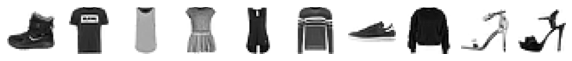

In [ ]:
# 그림으로 그리면,
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


# 로지스틱 회귀로 패션 아이템 분류하기

## 정규화

In [ ]:
# SGDC는 2차원 입력을 다루지 못하기에 1차원 배열로 바꿈, reshape()
train_scaled = train_input / 255.0    # 이미지 데이터의 경우 픽셀 0~255이기 때문에 255로 나누어 0~1의 양수값으로 정규화함
train_scaled = train_scaled.reshape(-1, 28*28)    
# reshape() 메소드의 두 번째 매개변수를 28 X 28 크기에 맞게 지정하여 샘플 개수의 변동 없이, 원본 데이터의 두, 세 번째 차원을 1차원으로 합침

In [ ]:
print(train_scaled.shape)
# 784개의 픽셀로 이루어진 6만개의 샘플로 준비됨.

(60000, 784)


## 교차검증

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


In [ ]:
sc = SGDClassifier(loss='log', max_iter=9, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8303666666666667


In [ ]:
sc = SGDClassifier(loss='log', max_iter=20, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))
# 반복 횟수를 늘려도 유의미한 성능 향상이 없음

0.8436666666666666


# 인공신경망

## 텐서플로, 케라스

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

## 인공 신경망으로 모델 만들기

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
print(train_scaled.shape, train_target.shape)

(38400, 784) (38400,)


In [ ]:
print(val_scaled.shape, val_target.shape)
# 6만개 중 1만 2천개가 검증 세트로 분리됨

(9600, 784) (9600,)


In [ ]:
# 훈련 세트로 모델 제작 후 검증 세트로 평가
# 밀집층 dense 만들기]
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))    # 뉴런 개수(= 분류한 클래스의 수), 사용할 함수(클래스별 확률을 구하기 위해 소프트맥스 사용), 입력의 크기(픽셀 수)

In [ ]:
model = keras.Sequential(dense)

# 인공 신경망으로 패션 아이템 분류하기

In [ ]:
# 케라스 모델은 훈련 전에 compile()메소드를 통해 손실 함수를 반드시 설정해야함
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# 손실함수를 거치는 과정에서 타깃값은 '원-핫 인코딩'이 필요함, 원-핫 인코딩이 된 타깃값이라면 sparse 생략, 아니라면 sparse를 통해 원-핫 인코딩을 하지 않아도 됨
# 케라스 모델은 훈련 시 에포크마다 손실 값을 출력, 이에 정확도도 함께 출력하기 위해 metrics='accuracy' 설정
# cartegorical_crossentropy == 다중분류를 위한 크로스 엔트로피
# binary_crossentropy == 이진분류를 위한 크로스 엔트로피

In [ ]:
print(train_target[:10])

[9 4 9 0 4 9 3 6 4 7]


In [ ]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1200/1200 [==============================] - 6s 3ms/step - loss: 0.6330 - accuracy: 0.7857
Epoch 2/5
1200/1200 [==============================] - 4s 3ms/step - loss: 0.4922 - accuracy: 0.8352
Epoch 3/5
1200/1200 [==============================] - 3s 2ms/step - loss: 0.4646 - accuracy: 0.8456
Epoch 4/5
1200/1200 [==============================] - 3s 2ms/step - loss: 0.4509 - accuracy: 0.8489
Epoch 5/5
1200/1200 [==============================] - 3s 2ms/step - loss: 0.4438 - accuracy: 0.8517


In [ ]:
# 케라스에서 모델 평가는 evaluate() 메소드를 사용
model.evaluate(val_scaled, val_target)

300/300 [==============================] - 1s 2ms/step - loss: 0.4387 - accuracy: 0.8521


[0.43865159153938293, 0.8520833253860474]

# 전체 소스코드

# 인공 신경망

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


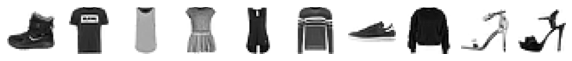

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기

In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

# 사이킷런 1.1 버전에서는 SGDClassifier의 loss 매개변수 중 
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생합니다.
# 사이킷런 1.1 이상을 사용하는 경우 loss='log'를 loss='log_loss'로 변경하세요.
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

0.8196000000000001


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## 인공신경망

### 텐서플로와 케라스

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

## 인공신경망으로 모델 만들기

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [ ]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [ ]:
model = keras.Sequential(dense)

2022-05-19 01:03:35.014394: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 인공신경망으로 패션 아이템 분류하기

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 0.6058 - accuracy: 0.7932
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4785 - accuracy: 0.8385
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4564 - accuracy: 0.8471
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4435 - accuracy: 0.8539
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4358 - accuracy: 0.8551


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4579 - accuracy: 0.8483


[0.45794257521629333, 0.8483333587646484]

# 총 정리

## 키워드

### 인공신경망
      생물학적 뉴런에서 영감을 받아 만든 머신러닝 알고리즘
      실제의 뇌를 모델링한 것은 아님
      딥러닝이라고도 부름

### 텐서플로
      구글이 만든 딥러닝 라이브러, CPU와 GPU를 사용해 모델을 훈련

### 밀집층
      가장 간단한 인공신경망의 층
      뉴런들이 모두 연결되어 있기 대문에 완전 연결 층이라고도 부름
      출력층에 밀집층을 사용할 때는 분류하려는 클래스와 동일한 개수의 뉴런을 사용
      

### 원-핫 인코딩
      정숫값을 배열에서 해당 정수 위치의 원소만 1, 나머지는 모두 0으로 변환하는 과정
      다중 분류에서 출력층에서 만든 확률과 크로스 엔트로피 손실을 계산하기 위함
      텐서플로에서는 'sparse_categorical_entropy'로 손실을 지정하면 해당 과정 불필요

## 핵심 패키지와 함수

### TensorFlow

#### Dense
      신경망에서 가장 기본 층인 밀집층을 만드는 클래스
      첫 매개변수로 뉴런의 개수(분류할 클래스의 개수를 지정)
      activation 매개변수에 사용할 활성화 함수 지정, 'sigmoid'와 'softmax'가 있음, 미지정시 활성화 함수 사용 X
      케라스의 Sequential 클래스에 맨 처음 추가되는 층에는 input_shape 매개변수로 입력의 크기를 지정해야 함


#### Sequential
      케라스에서 신경망 모델을 만드는 클래스
      객체를 생성할 때 신경망 모델에 추가할 층을 지정할 수 있음
      층이 1개 이상일 경우 파이썬 리스트로 전달

#### Compile()
      모델 객체를 만든 후 훈련 전에 사용할 손실 함수와 측정 지표 등을 지정하는 메소드
      loss 매개변수에 손실 함수 지정, 이진 분류: 'binary_crossentropy', 다중 분류: 'categorical_crossentropy'로 지정, 회귀 모델일 경우 'mean_square_error'등으로 지정
      

#### fit()
       훈련에 사용하는 메소드
       첫 번째와 두 번째 매개변수에 입력과 타깃 데이터를 전달
       epochs 매개변수에 반복할 에포크 횟수를 지정

#### evaluate()
        모델 성능 평가에 사용하는 메소드
        첫 번째와 두 번째 매개변수에 입력과 타깃 데이터를 전달
        compile() 메소드에 loss 매개변수에 지정한 손실 함수의 값과 metrics 매개변수에 지정한 측정 지표를 출력

## 팁
      1. 이미지 MNIST의 경우 픽셀은 0~255 사이 정숫값을 가지므로, 255로 나누어 0~1 사이의 값으로 정규화하는 전처리를 거쳐야 함

      2. 각 클래스 별 가중치와 절편은 달라야 함. ex) 10개의 클래스의 경우 각 가중치마다 10개의 다른 w1~wn값을 가짐

      3. 절편은 모식도에서 생략하는 경우가 많으나 각 뉴런(분류할 클래스)별로 하나의 절편을 가짐을 잊지 말 것

      4. 케라스는 텐서플로의 고수준 API, 텐서플로는 케라스의 백엔드

      5. 로지스틱 회귀에서는 교차 검증을 사용해 모델을 평가하지만 검증 세트를 별도로 덜어내는 사용, 그 이유는
          1. 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적
          2. 교차 검증을 수행하기에 훈련시간이 길어짐

      6. 케라스 모델은 훈련 전에 compile() 메소드를 통해 손실 함수의 종류를 지정해야 함
      
      7. 케라스는 다중 분류에서 원-핫 인코딩이 되지 않은 데이터도 compile() 메소드의 loss 매개변수에 'sparse_categorical_crossentropy'지정을 통해 처리가 가능함

      8. 원-핫 인코딩을 거친 경우 sparse를 제거하면 됨

      9. compile() 메소드의 metrics 매개변수에 정확도 지표를 의미하는 'accuracy'를 지정하면 각 에포크의 손실 값과 정확도가 함께 출력 됨
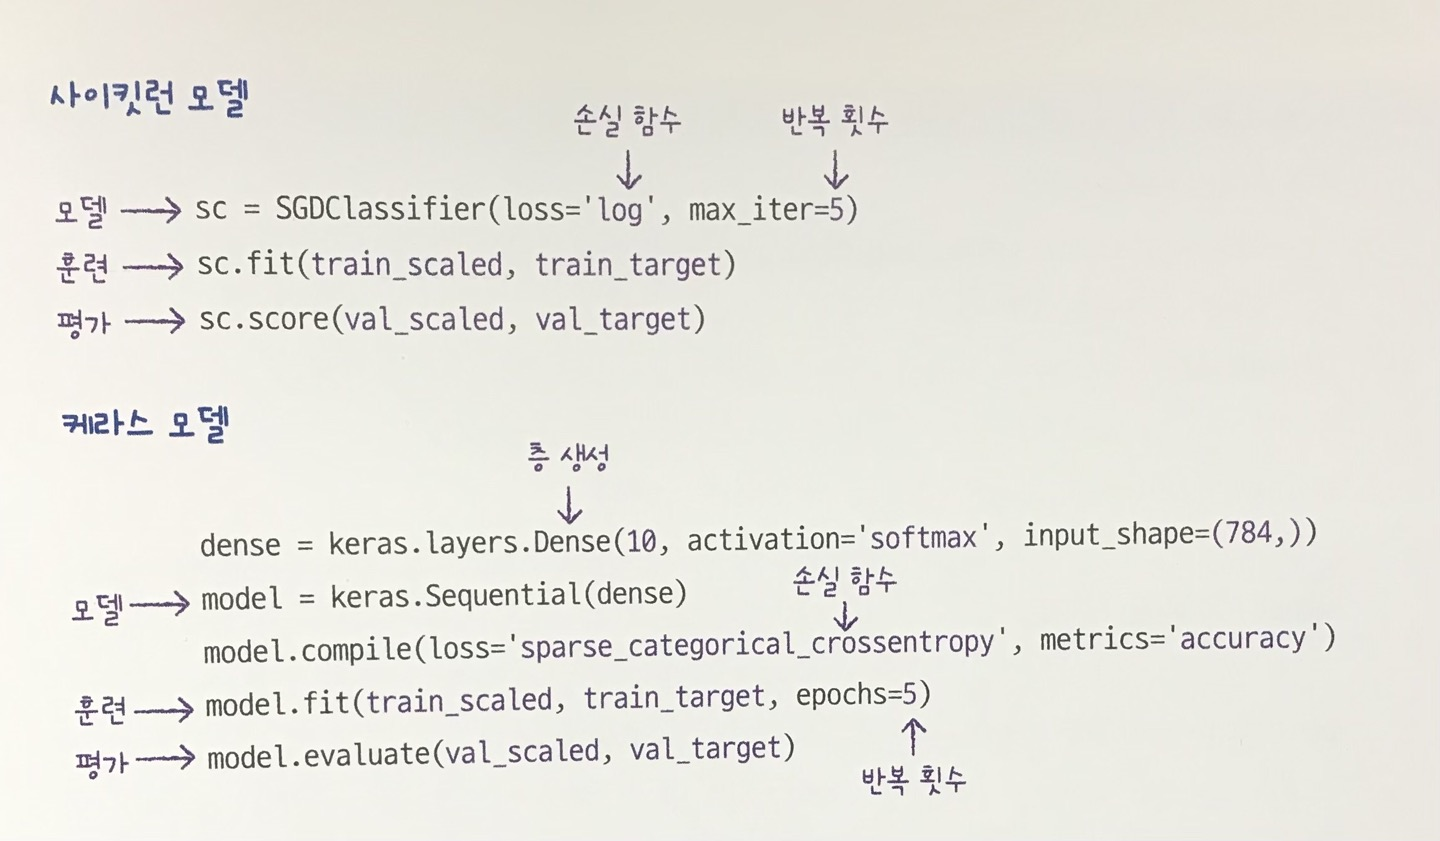
